## Overview
Some general questions to consider:
- How can we best predict streams on Spotify?
- How do top 100 songs differ across platforms?
- What variables best predict a song's genre?
- What genre dominates the top 100 songs on Spotify?

### How can we best predict streams on Spotify?

Basic analysis of dataset:

In [53]:
# load in dataset
import pandas as pd
og_spotify = pd.read_csv("/Users/diegomartinez/Data/spotify.csv", encoding='ISO-8859-1')
og_spotify

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,7,0,0,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5


In [54]:
# any missing values?
og_spotify.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

We have NA entries for *in_shazam_charts* (50) and *key* (95)

In [55]:
# remove nas
spotify = og_spotify.dropna()

In [56]:
# basic info
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            817 non-null    object
 1   artist(s)_name        817 non-null    object
 2   artist_count          817 non-null    int64 
 3   released_year         817 non-null    int64 
 4   released_month        817 non-null    int64 
 5   released_day          817 non-null    int64 
 6   in_spotify_playlists  817 non-null    int64 
 7   in_spotify_charts     817 non-null    int64 
 8   streams               817 non-null    object
 9   in_apple_playlists    817 non-null    int64 
 10  in_apple_charts       817 non-null    int64 
 11  in_deezer_playlists   817 non-null    object
 12  in_deezer_charts      817 non-null    int64 
 13  in_shazam_charts      817 non-null    object
 14  bpm                   817 non-null    int64 
 15  key                   817 non-null    object


In [57]:
# summary stats (counts, mean, std, min & max, quartiles)
spotify.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000
mean,1.567931,2018.457772,6.018360,13.696450,4849.898409,11.722154,60.161567,49.473684,2.451652,122.565483,67.391677,51.201958,64.362301,26.309670,1.676867,18.168911,10.526316
std,0.876211,10.829267,3.572554,9.299663,7741.126455,18.617668,74.923594,49.570455,5.397024,28.174803,14.688458,23.620978,16.107587,25.470972,8.767328,13.541996,10.219987
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2021.000000,3.000000,5.000000,829.000000,0.000000,12.000000,6.000000,0.000000,99.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,5.000000,13.000000,2040.000000,3.000000,32.000000,34.000000,0.000000,120.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,4890.000000,16.000000,78.000000,84.000000,2.000000,141.000000,79.000000,70.000000,76.000000,41.000000,0.000000,24.000000,12.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,532.000000,275.000000,45.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [58]:
# number of unique entries
spotify.nunique()

track_name              811
artist(s)_name          571
artist_count              8
released_year            46
released_month           12
released_day             31
in_spotify_playlists    756
in_spotify_charts        76
streams                 814
in_apple_playlists      206
in_apple_charts         163
in_deezer_playlists     292
in_deezer_charts         31
in_shazam_charts        187
bpm                     122
key                      11
mode                      2
danceability_%           71
valence_%                94
energy_%                 78
acousticness_%           93
instrumentalness_%       36
liveness_%               66
speechiness_%            48
dtype: int64

In [59]:
# potential feature correlation
spotify.corr(numeric_only = True)

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
artist_count,1.000000,0.073564,0.033857,-0.014762,-0.085226,-0.008570,-0.017024,-0.075271,0.020585,-0.058844,0.214078,0.123650,0.137530,-0.094704,-0.061269,0.034354,0.131486
released_year,0.073564,1.000000,0.076439,0.166377,-0.390729,0.068679,-0.201474,0.003479,0.095741,-0.011570,0.215032,-0.047643,0.078886,-0.133224,-0.023958,0.008489,0.129887
released_month,0.033857,0.076439,1.000000,0.057784,-0.122407,-0.050186,-0.034029,-0.017813,0.006942,-0.049400,-0.054808,-0.110355,-0.086897,0.055046,0.035481,0.001329,0.042127
released_day,-0.014762,0.166377,0.057784,1.000000,-0.107616,0.016068,-0.011916,0.007727,0.055426,-0.033394,0.084244,0.062751,0.047318,0.000785,0.023040,-0.011094,-0.014602
in_spotify_playlists,-0.085226,-0.390729,-0.122407,-0.107616,1.000000,0.141343,0.688316,0.215676,0.101283,-0.034483,-0.096981,-0.029823,0.035875,-0.064633,-0.024570,-0.051973,-0.077610
in_spotify_charts,-0.008570,0.068679,-0.050186,0.016068,0.141343,1.000000,0.208202,0.556804,0.566161,0.028830,0.051338,0.050040,0.104963,-0.072853,-0.005814,-0.026582,-0.094102
in_apple_playlists,-0.017024,-0.201474,-0.034029,-0.011916,0.688316,0.208202,1.000000,0.364761,0.326815,0.005558,-0.012586,0.041253,0.039992,-0.070965,-0.054372,-0.064986,-0.097647
in_apple_charts,-0.075271,0.003479,-0.017813,0.007727,0.215676,0.556804,0.364761,1.000000,0.366581,0.027057,-0.026138,0.042941,0.129354,-0.096781,-0.000381,-0.007161,-0.146472
in_deezer_charts,0.020585,0.095741,0.006942,0.055426,0.101283,0.566161,0.326815,0.366581,1.000000,0.021730,0.081414,0.073169,0.104350,-0.035135,0.003503,0.003650,-0.081523
bpm,-0.058844,-0.011570,-0.049400,-0.033394,-0.034483,0.028830,0.005558,0.027057,0.021730,1.000000,-0.148174,0.029169,0.013363,-0.010767,-0.003407,-0.005817,0.038248


In [60]:
# rename some columns
renames = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
new_names = ['danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']
renamer = dict(zip(renames, new_names))
spotify = spotify.rename(columns = renamer)
spotify

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,7,0,0,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5


In [61]:
# convert streams to numeric
spotify['streams'] = pd.to_numeric(spotify['streams'], errors='coerce')

### Some visualizations

A couple of initial scatterplots to get an idea of what relationships there are between predictors

Feature correlation suggests that there's some kind of relationship between streams and the number of Spotify playlists a song is in, so we'll start there.

<Axes: xlabel='in_spotify_playlists', ylabel='streams'>

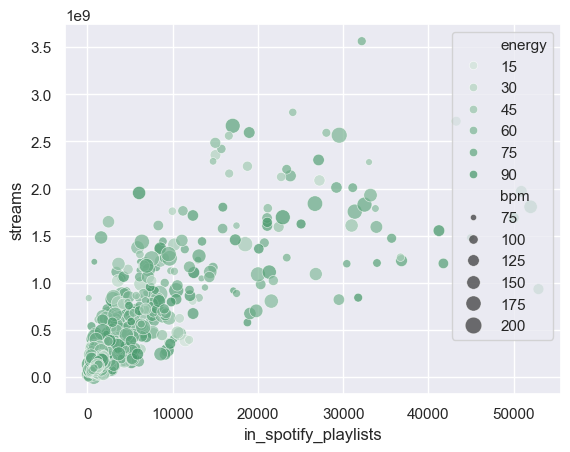

In [62]:
# plot streams vs number of spotify playlists a song is in, conditioned on a couple other predictors of interest
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.light_palette("seagreen", as_cmap = True)
sns.scatterplot(
    data = spotify, x = 'in_spotify_playlists', y = 'streams', hue = 'energy', size = 'bpm',
    sizes = (10, 150), hue_norm = (0,100), palette = palette, alpha = 0.7
)

A more careful estimate of the density and marginal distributions for the observations bunched up in the corner?

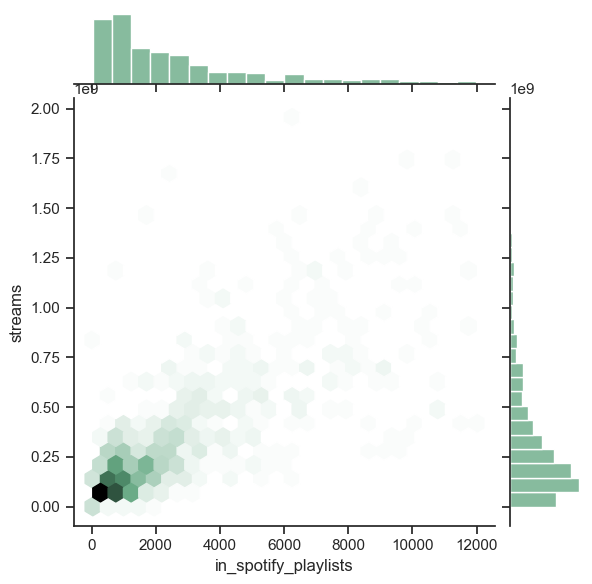

In [63]:
# joint plot with marginal densities for streams and # of spotify playlists variable
subset = spotify[(spotify['streams'] < 2e9) & (spotify['in_spotify_playlists'] < 12000)]
sns.set_theme(style = 'ticks')
sns.jointplot(
    data = subset, x = 'in_spotify_playlists', y = 'streams', kind = 'hex',
    gridsize = 25, color= '#5FA57E'
) 

Checking for multicollinearity

In [64]:
# compute VIF to check for multicollinearity
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

predictors = spotify.drop(columns = ['track_name', 'artist(s)_name', 'key', 'mode', 'streams'])
predictors = predictors.apply(pd.to_numeric, errors='coerce').fillna(0)
predictors = add_constant(predictors)

vifs = pd.DataFrame()
vifs['feature'] = predictors.columns
vifs['VIF'] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
print(vifs)

                 feature           VIF
0                  const  47403.244309
1           artist_count      1.097227
2          released_year      1.370149
3         released_month      1.062338
4           released_day      1.054011
5   in_spotify_playlists      2.402625
6      in_spotify_charts      2.164785
7     in_apple_playlists      2.674581
8        in_apple_charts      1.700073
9    in_deezer_playlists      1.253513
10      in_deezer_charts      1.706794
11      in_shazam_charts      1.492876
12                   bpm      1.062000
13          danceability      1.512280
14               valence      1.514229
15                energy      1.789396
16          acousticness      1.634347
17      instrumentalness      1.045439
18              liveness      1.048892
19           speechiness      1.108821


Next, we consider the relationship between streams and a few variables of choice when conditioned on either major or minor modes.

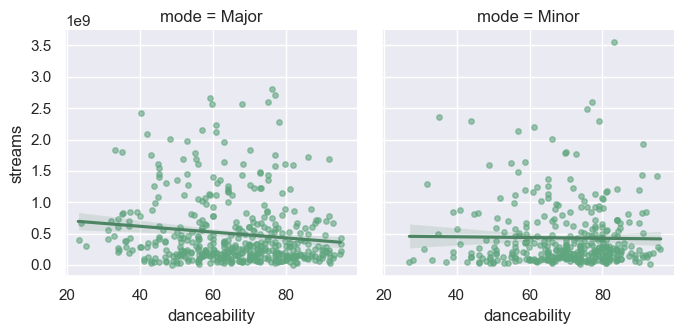

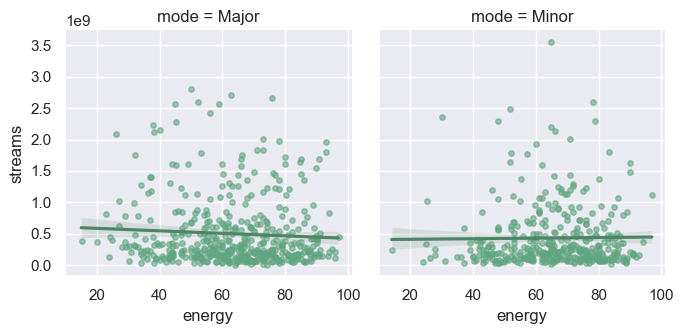

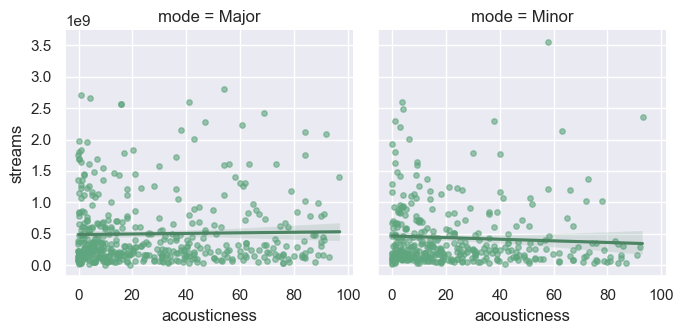

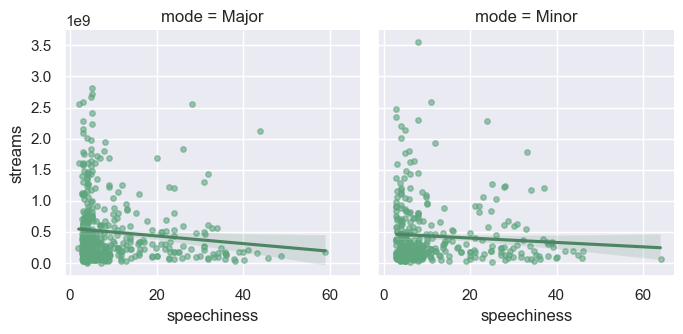

In [65]:
# facet plot for streams vs a few different predictors, conditioned on song mode
sns.set_style('darkgrid')
lmplot_cols = ['streams', 'key', 'mode', 'danceability', 'energy', 'acousticness', 'speechiness']
x_lmplot_cols = ['danceability', 'energy', 'acousticness', 'speechiness']
for col in x_lmplot_cols:
    sns.lmplot(
    data = spotify[lmplot_cols], x = str(col), y = 'streams',
    col = 'mode', height = 3.5, x_jitter = 0.2, y_jitter = 0.2, markers = 'o',
    scatter_kws={"s": 15, 'color': '#5FA57E', 'alpha': 0.6}, line_kws={"color": "#4c8464"}
)

Relationship between streams and energy appears to be slightly more negative for major songs than minor songs. The rest of the linear fits don't seem to be very informative besides suggesting that there isn't much of a difference in linear relationship (if any) between major and minor songs.

Categorical scatterplot on key, mode

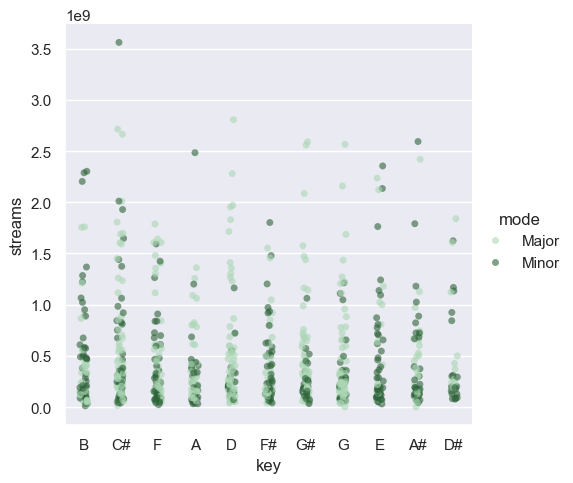

In [66]:
# categorical scatterplot on key and mode
palette = ["#acd7b5", "#2d6238"]
sns.catplot(data = spotify, x = 'key', y = 'streams', hue = 'mode', palette = palette,
            kind = 'strip', jitter = True, alpha = 0.6)

Maybe we can spot differences in the distribution better with a violin plot?

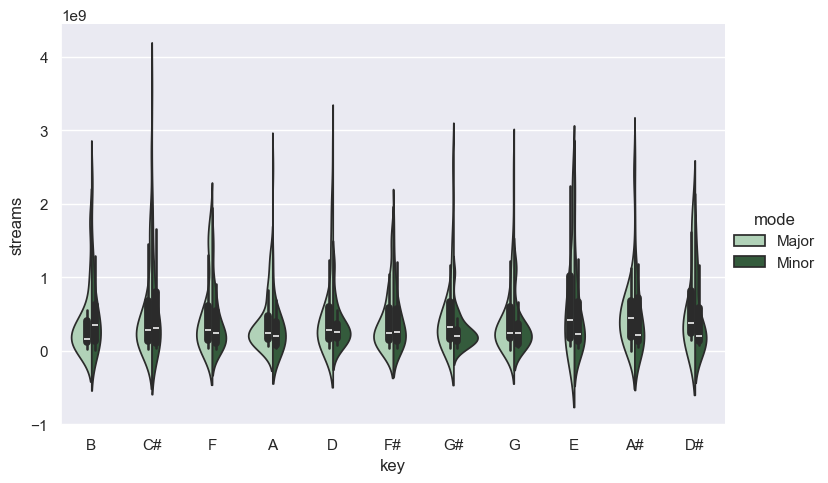

In [67]:
# approximate densities with violin plot, conditioned on song key and mode
sns.catplot(data = spotify, kind = 'violin', x = 'key', y = 'streams', 
            hue = 'mode', split = True, palette = palette, aspect = 1.5)

Means between the two distributions(major and minor modes) for each key seem to be relatively equal for most keys except songs in the key of B, E, A#, and D#?

General pairwise grid

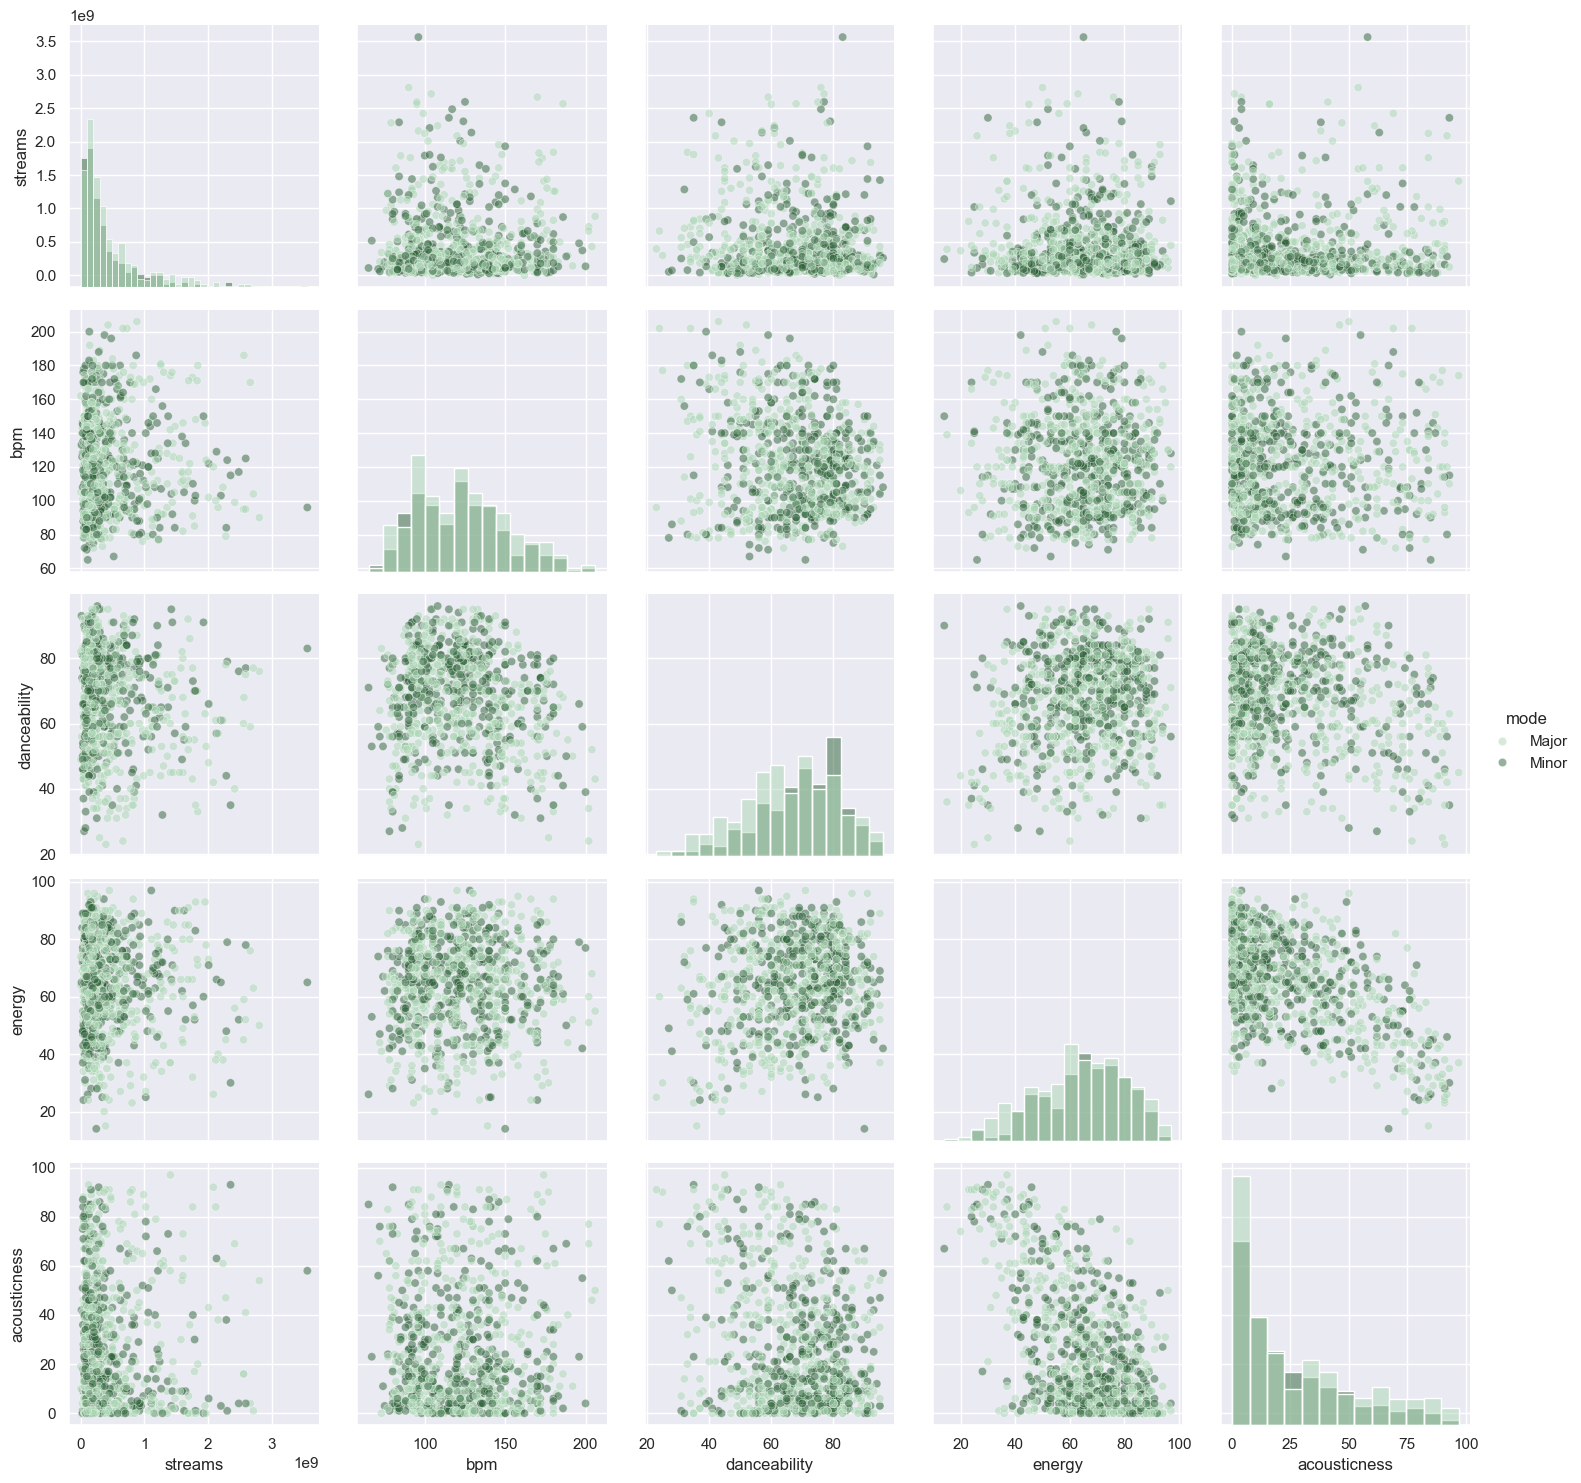

In [68]:
# pairwise plot with var i vs var j on entry (i,j) and distributions for each variable along the diagonal
pairgrid_col = ['streams', 'mode', 'bpm', 'danceability', 'energy', 'acousticness']
g = sns.PairGrid(spotify[pairgrid_col], hue = 'mode', palette = palette, height = 3)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot, alpha = 0.5)
g.add_legend()

Distribution of streams, bpm, danceability, and energy seem relatively equal when conditioned on major vs minor modes. The acousticness distribution spikes around zero when conditioned on major mode. There's a clear negative relationship between energy and acousticness.

Lastly, a more general (and customizable) scatterplot!

In [69]:
# more general customizable scatterplot
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Spectral5
from ipywidgets import interact

# to output in a jupyter notebook
output_notebook()
sizes = list(range(6, 22, 3))

# color gradient
forest_green_gradient = [
    '#a8e6a3',  
    '#8ddc8c',  
    '#72d174',  
    '#57c65c',  
    '#3cbb44',  
    '#228B22'   
]

# number of colors and sizes
colors = forest_green_gradient
n_sizes = len(sizes)
n_colors = len(colors)
columns = sorted(spotify.columns)
continuous = [x for x in columns if spotify[x].dtype in [np.float64, np.int64]]


# define create_figure function for widget display
def create_figure(x_axis='danceability', y_axis='energy', size_column='None', color_column='None'):
    df = spotify.copy()
    
    # adjust size based on color
    if size_column != 'None':
        if len(set(df[size_column])) > n_sizes:
            groups = pd.qcut(df[size_column].values, n_sizes, duplicates='drop')
        else:
            groups = pd.Categorical(df[size_column])
        df['size'] = [sizes[xx] for xx in groups.codes]  # add size column to dataframe
    else:
        df['size'] = 9  # default size for all points if no column is selected
    
    # adjust color based on column
    if color_column != 'None':
        if len(set(df[color_column])) > n_colors:
            groups = pd.qcut(df[color_column].values, n_colors, duplicates='drop')
        else:
            groups = pd.Categorical(df[color_column])
        df['color'] = [colors[xx] for xx in groups.codes]  # add 'color' column to DataFrame
    else:
        df['color'] = "#31AADE"  # default color for all points if no column is selected

    source = ColumnDataSource(df)  # update columndatasource with modified data
    
    p = figure(height=600, width=800, title=f"{x_axis.title()} vs {y_axis.title()}", tools='pan,box_zoom,hover,reset')
    p.xaxis.axis_label = x_axis.title()
    p.yaxis.axis_label = y_axis.title()
    
    p.circle(x=x_axis, y=y_axis, source=source, size='size', color='color', line_color="white", alpha=0.6, hover_color='white', hover_alpha=0.5)
    
    hover = p.select_one(HoverTool)
    hover.point_policy = "follow_mouse"
    hover.tooltips = [(x_axis, f"@{x_axis}"), (y_axis, f"@{y_axis}"), ("index", "$index")]
    
    show(p)

# interactive widget using create_figure function
interact(create_figure, x_axis=columns, y_axis=columns, size_column=['None'] + continuous, color_column=['None'] + continuous)

Loading BokehJS ...

interactive(children=(Dropdown(description='x_axis', index=4, options=('acousticness', 'artist(s)_name', 'arti…

<function __main__.create_figure(x_axis='danceability', y_axis='energy', size_column='None', color_column='None')>

# Random forest: predicting streams
An alternative to lasso and ridge regression, we'll compare

In [70]:
# log transform
spotify = spotify.dropna(subset = ['streams'])
spotify['streams'] = np.log(spotify['streams'])
spotify

/var/folders/2p/9bm6r93n0_lg1mmysjbx3xbr0000gn/T/ipykernel_48875/1076588921.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify['streams'] = np.log(spotify['streams'])


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,18.766974,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,18.711231,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,18.757181,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,20.501173,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,19.530023,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,18.331558,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,18.618481,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,18.112982,2,0,7,0,0,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,18.712571,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5


In [71]:
import sklearn.model_selection as skm
from matplotlib.pyplot import subplots
from sklearn.tree import (DecisionTreeRegressor as DTR, plot_tree)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import (accuracy_score, log_loss)
from sklearn.ensemble import (RandomForestRegressor as RF, GradientBoostingRegressor as GBR)
from patsy import dmatrices, dmatrix

# design matrix
design = dmatrix('artist_count + in_spotify_playlists'
                 + ' + in_spotify_charts'
                 + ' + bpm + key + mode + danceability + valence + energy + acousticness + instrumentalness'
                 + ' + liveness + speechiness + -1', spotify)

In [72]:
feature_names = list(design.design_info.column_names)
design_array = np.asarray(design)

# split into train and test sets
x_train, x_test, y_train, y_test = skm.train_test_split(design_array,
                                                        spotify['streams'],
                                                        test_size = 0.3)

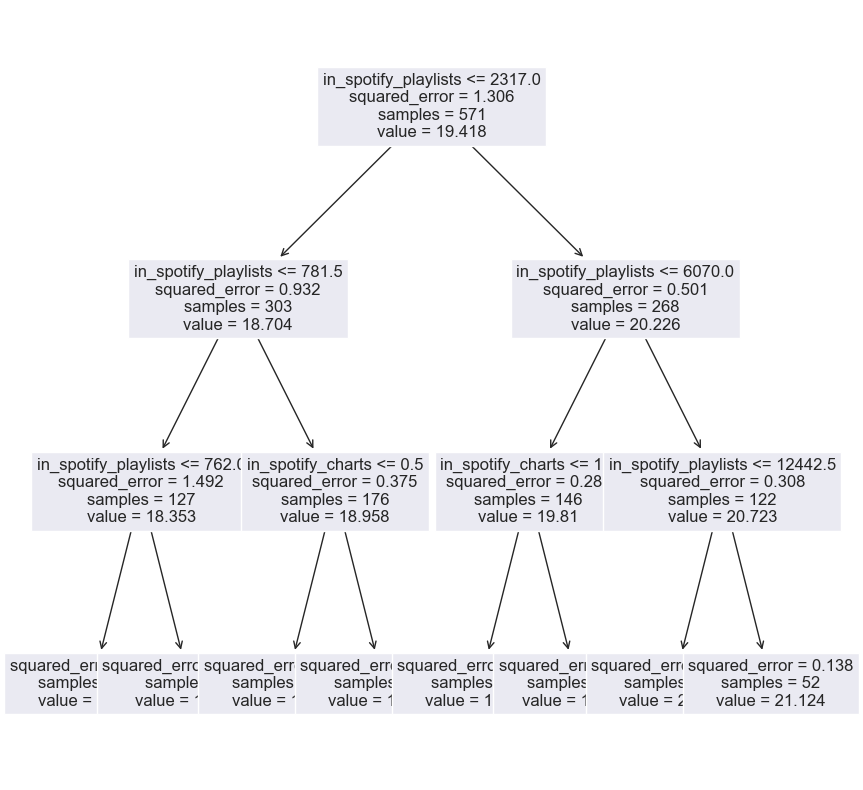

In [75]:
# fit a regression tree to training set, plot tree
model = DTR(max_depth = 3)
model.fit(x_train, y_train)
ax = subplots(figsize = (10, 10))[1]
plot_tree(model, feature_names = feature_names, ax = ax, fontsize = 12);

In [77]:
# compute test MSE
predictions = model.predict(x_test)
test_mse = mean_squared_error(y_test, predictions)
print("Test MSE:", test_mse)

# compute R^2
r2_train = model.score(x_train, y_train)
r2_test = model.score(x_test, y_test)
print(f"R^2 for training set: {r2_train}, R^2 for testing set: {r2_test}")

Test MSE: 0.45480967953919865
R^2 for training set: 0.6299728902044344, R^2 for testing set: 0.6227082595785758
